In [1]:
# Loading Necessary Libraries
#install.packages("systemfonts")
library(readxl)
library(moments)
library(zoo)
library(latex2exp)
library(showtext)
library(systemfonts)
library(ggplot2)
source('portConstruct.R')
source('portUtility.R')


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: sysfonts

Loading required package: showtextdb



In [3]:
rm(list=ls())              #clear the workspace
source("portConstruct.R") # load the fucntions for portfolio construction

In [4]:
#load the data 
data <- read_excel("GRA65602_project data_Fall2025.xlsx", sheet = "csv")
data$Date <- as.Date(data$Date)
head(data)

Date,us_eq,us_t1m,us_t1yr,us_t2yr,us_t5yr,us_t7yr,us_t10yr,us_t20yr,us_t30yr,⋯,wlrd_gbnd,wrldx_gbnd,dow_cbnd,com_ind,oil,us_infl,P/D,P/E,y_3m,y_10y
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1946-12-31,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,22.62941,11.37278,0.38,1.82
1947-01-31,1.3084,0.02640758,0.17831245,0.15698055,0.22676117,0.29087267,0.22745171,-0.06277434,-0.06277434,⋯,0.5332620,0.5390308,1.0792164,0.6595822,NA,0.6517691,22.76622,11.46930,0.38,1.78
1947-02-28,-1.1091,0.02852513,0.06268155,0.02132673,0.05898492,0.21162524,0.32339512,0.21007895,0.21007895,⋯,-0.3177945,-0.4867873,0.3757280,3.2140777,NA,1.7576318,21.79050,11.94957,0.38,1.76
1947-03-31,-1.6790,0.02852513,0.10524982,0.21829849,0.23983397,0.31710272,0.13810466,0.19812779,0.19812779,⋯,-0.2681048,-0.3775328,0.1185352,8.4377289,NA,0.0000000,21.19307,11.28790,0.38,1.76
1947-04-30,-4.7698,0.02852187,0.04539845,-0.00135084,-0.13039708,-0.03692658,-0.04302926,-0.36749641,-0.36749641,⋯,0.2685794,0.3484741,-0.5452393,-12.2415826,NA,-0.2272727,19.96608,10.90083,0.38,1.78
1947-05-31,-0.9625,0.02852662,0.12199022,0.05606063,0.07754507,0.24416991,0.21270669,0.33415158,0.33415158,⋯,0.2503421,0.2535754,-0.8990946,-5.3102516,NA,0.5922551,19.15370,10.73367,0.38,1.77


In [5]:
req_data <- data[2:nrow(data),c("Date","wrld_eq","us_t1m","wlrd_gbnd","us_infl")]
req_data[, 2:5] <- req_data[, 2:5] / 100
head(req_data)

Date,wrld_eq,us_t1m,wlrd_gbnd,us_infl
<date>,<dbl>,<dbl>,<dbl>,<dbl>
1947-01-31,0.0283385093,0.0002640758,0.005332620,0.006517691
1947-02-28,-0.0003775009,0.0002852513,-0.003177945,0.017576318
1947-03-31,0.0147280967,0.0002852513,-0.002681048,0.000000000
1947-04-30,0.0078154075,0.0002852187,0.002685794,-0.002272727
1947-05-31,-0.0121861152,0.0002852662,0.002503421,0.005922551
1947-06-30,0.0093457944,0.0002851915,-0.004443557,0.006793478


In [6]:
# Queston 2.1)
# Calculating the real return for the selected assets
r_eq_real   <- (1 + req_data$wrld_eq)   / (1 + req_data$us_infl) - 1
r_bond_real <- (1 + req_data$wlrd_gbnd) / (1 + req_data$us_infl) - 1
r_rf_real   <- (1 + req_data$us_t1m)   / (1 + req_data$us_infl) - 1 

# Moments of Two Assets
mu_eq_real   <- mean(r_eq_real)   # mean of real equity return
sd_eq_real   <- sd(r_eq_real)     # standard deviation of real equity return
mu_bond_real <- mean(r_bond_real) # mean of real bond return
sd_bond_real <- sd(r_bond_real)   # standard deviation of real bond return
cov_eq_bond <- cov(r_eq_real, r_bond_real) # covariance between real equity and real bond returns
corr_eq_bond <- cor(r_eq_real, r_bond_real) # covariance between real equity and real bond returns

# Constructing the banchmark portfolio
weight_equity <- 0.70
weight_bond <- 0.30
return_benchmark <- weight_equity * r_eq_real + weight_bond * r_bond_real

# Calculatin the return statistics for the benchmarkt portfolio
mu_p_benchmark <- mean(return_benchmark) # mean real return of benchmark portfolio
sd_p_benchmark <- sd(return_benchmark) # standard deviation of benchmark portfolio
mu_rf <- mean(r_rf_real) # mean of real risk free rate

# Calculating the Fund's Risk Aversion(The fund is fully invested in risky assets)
#gamma <- (mu_p_benchmark - mu_rf) / (sd_p_benchmark^2)
gamma <- (mu_eq_real - mu_bond_real)/(weight_equity*(sd_eq_real^2 + sd_bond_real^2 - 2 * cov_eq_bond)
-(sd_bond_real^2 - cov_eq_bond))

cat(sprintf("The fund's relative risk aversion is (Gamma): %s \n", round(gamma, digits = 2)))

# Asset Moments:
cat(sprintf("Mean real equity return: %.4f\n", mu_eq_real))
cat(sprintf("SD real equity return: %.4f\n", sd_eq_real))
cat(sprintf("Mean real bond return: %.4f\n", mu_bond_real))
cat(sprintf("SD real bond return: %.4f\n", sd_bond_real))
cat(sprintf("Correlation (equity, bond): %.4f\n", corr_eq_bond))


The fund's relative risk aversion is (Gamma): 4.44 
Mean real equity return: 0.0057
SD real equity return: 0.0391
Mean real bond return: 0.0020


SD real bond return: 0.0200
Correlation (equity, bond): 0.3356


In [8]:
# Question 2.2)
# Optimal Portfolio with Risk Free Asset

data2 <- data.frame(r_eq_real = r_eq_real, r_bond_real = r_bond_real)
data2_excess_ret <-  sweep(data2, 1, r_rf_real, "-") # Execess Retun

# Computing mean vector and covariance matrix of excess returns
Mu <- colMeans(data2_excess_ret) # mean vector of excess returns
Sigma <- cov(data2_excess_ret) # covariance matrix

# Computing optimal weights(Risky Assets, Unconstrained)
w1 <- uncTangent(Mu, Sigma)
t(w1)

# Time series return of unconstranined tangent portfolio
ret_tangent_unc <-  w1["r_eq_real"]*r_eq_real + w1["r_bond_real"]*r_bond_real

mu_tan   <- mean(ret_tangent_unc)
var_tan  <- var(ret_tangent_unc)
sd_tan   <- sqrt(var_tan)
SR_tan   <- (mu_tan - mean(r_rf_real)) / sd_tan

# Optimal portfolio allocation to  risky assets
w_opt = (mu_tan - mean(r_rf_real)) / (gamma * var_tan)
print("The optimal allocation to the risk asset is:")
print(w_opt)

# Certianty Equivalnet(Optimal Unconstrained Portfolio)
#ret_opt <- w_opt * (ret_tangent_unc - r_rf_real) + (1 - w_opt) * r_rf_real # Taking real excess return
ret_opt <- w_opt * (ret_tangent_unc) + (1 - w_opt) * r_rf_real # Taking real return
mu_opt <- mean(ret_opt)
var_opt <- var(ret_opt)
#CE_rf <- (mean((1 + ret_opt)^(1 - gamma)))^(1/(1 - gamma))
CE_rf <- 1 + mu_opt  - 0.5*gamma*var_opt

# Certainty Equivalent(Benchmark Portfolio)
#CE_no_rf <- (mean((1 + return_benchmark)^(1 - gamma)))^(1/(1 - gamma))
CE_no_rf <- 1 + mu_p_benchmark  - 0.5*gamma*sd_p_benchmark^2

print(paste("Certainty Equivalnt(Optimal Unconstrained Portfolio with RF):", round(CE_rf,digits = 5)))
print(paste("Certianty Equivalent(Benchmark Portfolio):", round(CE_no_rf,digits = 5)))
print(paste("improvement in CE:", round((CE_rf - CE_no_rf),digits = 5)))
print(paste("mean return of optimal portfolio:", round(mu_opt,digits = 5)))
print(paste("standard deviation of optimal portfolio:", round(sqrt(var_opt),digits = 5)))


r_eq_real,r_bond_real
0.5672328,0.4327672


[1] "The optimal allocation to the risk asset is:"
[1] 1.251828


[1] "Certainty Equivalnt(Optimal Unconstrained Portfolio with RF): 1.00264"
[1] "Certianty Equivalent(Benchmark Portfolio): 1.00259"
[1] "improvement in CE: 5e-05"
[1] "mean return of optimal portfolio: 0.00506"
[1] "standard deviation of optimal portfolio: 0.03299"



Rolling Correlation Summary Statistics:
  Mean:     0.3291
  Median:   0.3365
  Std Dev:  0.1733
  Minimum:  -0.0451
  Maximum:  0.6496

Correlation Regimes:
  Positive correlation: 99.3% of periods
  Negative correlation: 0.7% of periods



Warning message:
"Removed 59 rows containing missing values or values outside the scale range
(`geom_line()`)."
Warning message:
"Removed 59 rows containing missing values or values outside the scale range
(`geom_ribbon()`)."
Warning message:
"Removed 59 rows containing non-finite outside the scale range (`stat_bin()`)."
Warning message:
"Removed 59 rows containing non-finite outside the scale range
(`stat_density()`)."


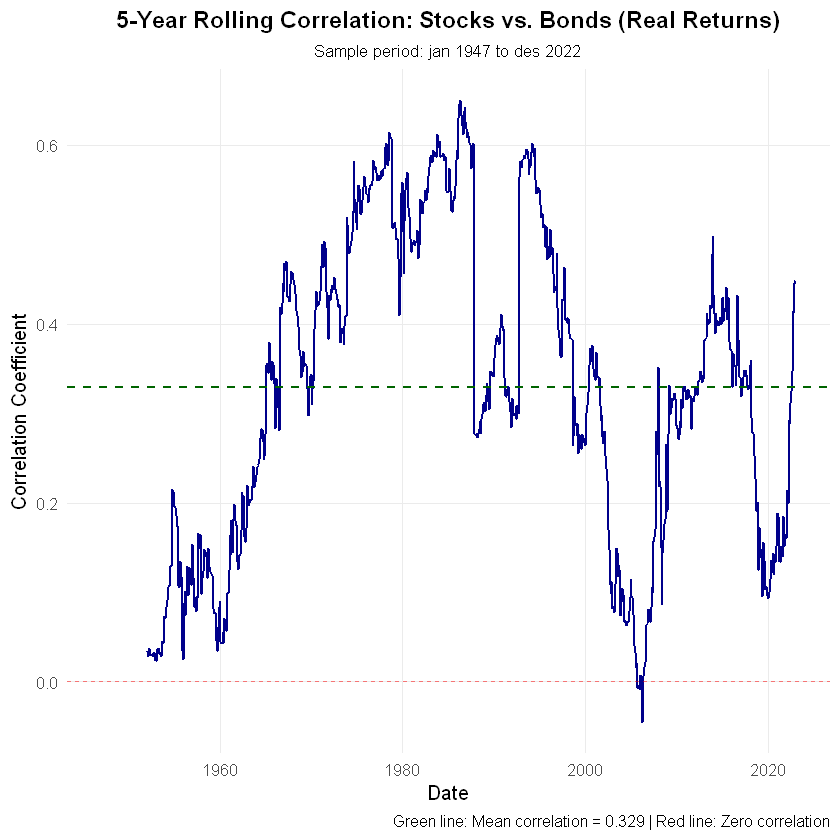

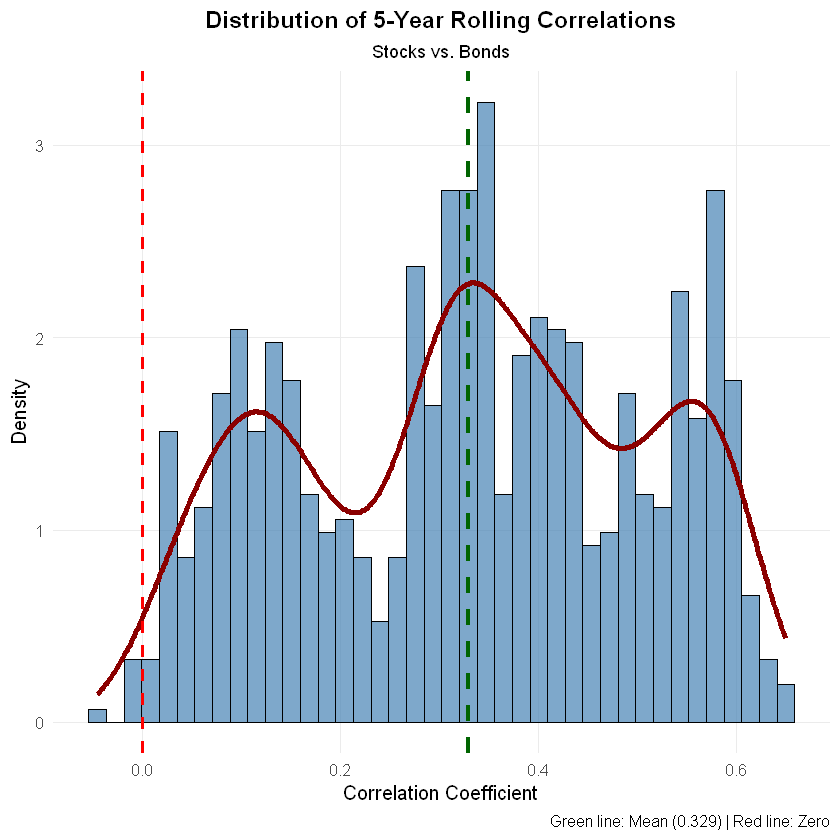

In [9]:
# Question 2.3)
# First Part: 5 year rolling window correlation between equity and bond returns

# Setting rolling window parameters(5 years = 60 months)
window_months <- 60

# Compute rolling correlation
rolling_corr <- rollapply(
  data.frame(r_eq_real, r_bond_real),
  width = window_months,
  FUN = function(x) cor(x[, 1], x[, 2]),
  by.column = FALSE,
  align = "right",
  fill = NA
)

# Create data frame for analysis
dates = req_data$Date
corr_data <- data.frame(
  Date = dates,
  Correlation = as.vector(rolling_corr)
)

# Summary statistics
cat("\nRolling Correlation Summary Statistics:\n")
cat(sprintf("  Mean:     %.4f\n", mean(rolling_corr, na.rm = TRUE)))
cat(sprintf("  Median:   %.4f\n", median(rolling_corr, na.rm = TRUE)))
cat(sprintf("  Std Dev:  %.4f\n", sd(rolling_corr, na.rm = TRUE)))
cat(sprintf("  Minimum:  %.4f\n", min(rolling_corr, na.rm = TRUE)))
cat(sprintf("  Maximum:  %.4f\n", max(rolling_corr, na.rm = TRUE)))

# Calculate time periods of positive vs negative correlation
n_valid <- sum(!is.na(rolling_corr))
n_positive <- sum(rolling_corr > 0, na.rm = TRUE)
n_negative <- sum(rolling_corr < 0, na.rm = TRUE)

cat(sprintf("\nCorrelation Regimes:\n"))
cat(sprintf("  Positive correlation: %.1f%% of periods\n", 100 * n_positive / n_valid))
cat(sprintf("  Negative correlation: %.1f%% of periods\n\n", 100 * n_negative / n_valid))

# Plot 1: Time Series of Rolling Correlation
p1 <- ggplot(corr_data, aes(x = Date, y = Correlation)) +
  geom_line(color = "darkblue", linewidth = 0.8) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "red", alpha = 0.5) +
  geom_hline(
    yintercept = mean(rolling_corr, na.rm = TRUE),
    linetype = "dashed",
    color = "darkgreen",
    linewidth = 0.8
  ) +
  geom_ribbon(
    aes(ymin = -Inf, ymax = Correlation),
    fill = ifelse(corr_data$Correlation > 0, "lightcoral", "lightblue"),
    alpha = 0.3
  ) +
  labs(
    title = "5-Year Rolling Correlation: Stocks vs. Bonds (Real Returns)",
    subtitle = paste0(
      "Sample period: ",
      format(min(dates), "%b %Y"),
      " to ",
      format(max(dates), "%b %Y")
    ),
    x = "Date",
    y = "Correlation Coefficient",
    caption = paste0(
      "Green line: Mean correlation = ",
      sprintf("%.3f", mean(rolling_corr, na.rm = TRUE)),
      " | Red line: Zero correlation"
    )
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 10, hjust = 0.5),
    panel.grid.minor = element_blank(),
    legend.position = "none"
  ) +
  scale_y_continuous(labels = scales::number_format(accuracy = 0.1))

#options(repr.plot.width = 10, repr.plot.height = 7)
print(p1)

# Plot 2: Histogram with Distribution
p2 <- ggplot(corr_data, aes(x = Correlation)) +
  geom_histogram(
    aes(y = after_stat(density)),
    bins = 40,
    fill = "steelblue",
    alpha = 0.7,
    color = "black",
    linewidth = 0.3
  ) +
  geom_density(color = "darkred", linewidth = 1.5) +
  geom_vline(
    xintercept = mean(rolling_corr, na.rm = TRUE),
    linetype = "dashed",
    color = "darkgreen",
    linewidth = 1.2
  ) +
  geom_vline(
    xintercept = 0,
    linetype = "dashed",
    color = "red",
    linewidth = 1
  ) +
  labs(
    title = "Distribution of 5-Year Rolling Correlations",
    subtitle = "Stocks vs. Bonds",
    x = "Correlation Coefficient",
    y = "Density",
    caption = paste0(
      "Green line: Mean (", sprintf("%.3f", mean(rolling_corr, na.rm = TRUE)),
      ") | Red line: Zero"
    )
  ) +
  theme_minimal(base_size = 12) +
  theme(
    plot.title = element_text(face = "bold", size = 14, hjust = 0.5),
    plot.subtitle = element_text(size = 11, hjust = 0.5),
    panel.grid.minor = element_blank()
  )

print(p2)


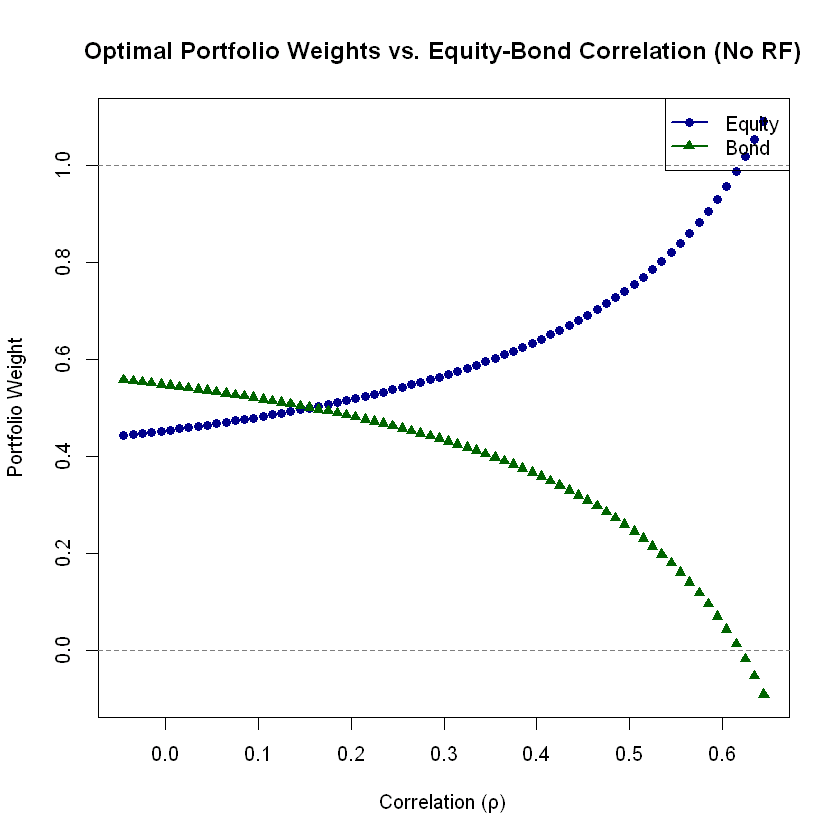

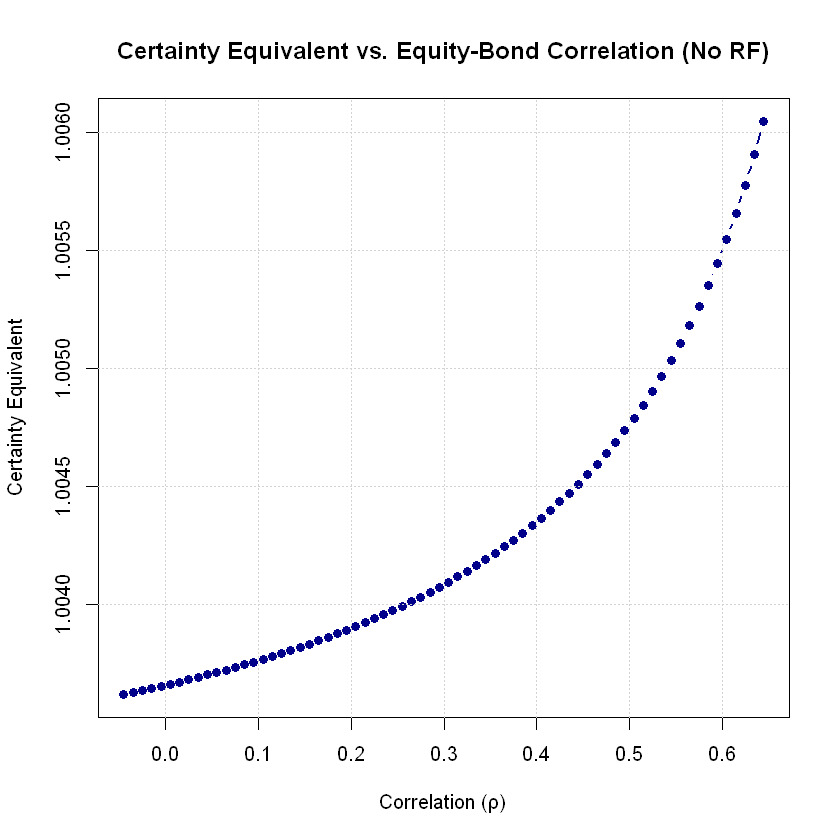

In [10]:
# Question 2.3)
# Second Part: Analyze the optimal portfolio and CE over a range of correlations
# VERSION: No investment in risk-free asset

# Creating the range of correlations (rolling_corr already defined earlier)
corr_range <- seq(min(rolling_corr, na.rm = TRUE),
                  max(rolling_corr, na.rm = TRUE),
                  by = 0.01)

# Initializing results data frame
results_portfolio <- data.frame(
  Correlation          = corr_range,
  Weight_Equity_Risky  = NA,
  Weight_Bond_Risky    = NA,
  Weight_Equity_Final  = NA,
  Weight_Bond_Final    = NA,
  Portfolio_Mean       = NA,
  Portfolio_SD         = NA,
  Sharpe_Ratio         = NA,
  Certainty_Equivalent = NA
)

# Loop over correlation values
for (i in seq_along(corr_range)) {
  rho <- corr_range[i]
  
  # Construct covariance matrix for this rho
  Sigma <- matrix(
    c(
      sd_eq_real^2,
      rho * sd_eq_real * sd_bond_real,
      rho * sd_eq_real * sd_bond_real,
      sd_bond_real^2
    ),
    nrow = 2,
    dimnames = list(c("Equity", "Bond"), c("Equity", "Bond"))
  )
  
  # Using professor's function for unconstrained tangency portfolio
  # (this gives optimal *risky* weights)
  w_risky <- uncTangent(Mu, Sigma)
  
  # No risk-free asset: final weights = tangency portfolio weights
  w_eq_final   <- as.numeric(w_risky["Equity"])
  w_bond_final <- as.numeric(w_risky["Bond"])
  
  # Portfolio mean and variance with these final weights
  mu_port <- w_eq_final * mu_eq_real + w_bond_final * mu_bond_real
  
  var_port <- w_eq_final^2 * sd_eq_real^2 +
              w_bond_final^2 * sd_bond_real^2 +
              2 * w_eq_final * w_bond_final * rho * sd_eq_real * sd_bond_real
  
  sigma_port <- sqrt(var_port)
  
  # Sharpe ratio (still measured vs risk-free rate if you want that comparison)
  sharpe_port <- (mu_port - mu_rf) / sigma_port
  
  # Certainty equivalent with CRRA utility
  CE <- ((1 + mu_port)^(1 - gamma))^(1 / (1 - gamma))
  
  # Store results
  results_portfolio$Weight_Equity_Risky[i]  <- w_risky["Equity"]
  results_portfolio$Weight_Bond_Risky[i]    <- w_risky["Bond"]
  results_portfolio$Weight_Equity_Final[i]  <- w_eq_final
  results_portfolio$Weight_Bond_Final[i]    <- w_bond_final
  results_portfolio$Portfolio_Mean[i]       <- mu_port
  results_portfolio$Portfolio_SD[i]         <- sigma_port
  results_portfolio$Sharpe_Ratio[i]         <- sharpe_port
  results_portfolio$Certainty_Equivalent[i] <- CE
}

## ---------------------------
## PLOTS
## ---------------------------

# Plot: Optimal Portfolio Weights vs. Correlation
plot(results_portfolio$Correlation, results_portfolio$Weight_Equity_Final, 
     type = "b", col = "darkblue", lwd = 2, pch = 16,
     ylim = range(c(results_portfolio$Weight_Equity_Final, 
                    results_portfolio$Weight_Bond_Final)),
     xlab = "Correlation (ρ)", 
     ylab = "Portfolio Weight",
     main = "Optimal Portfolio Weights vs. Equity-Bond Correlation (No RF)")

lines(results_portfolio$Correlation, results_portfolio$Weight_Bond_Final, 
      type = "b", col = "darkgreen", lwd = 2, pch = 17)

abline(h = 0, lty = 2, col = "gray50")
abline(h = 1, lty = 2, col = "gray50")

legend("topright", 
       legend = c("Equity", "Bond"),
       col = c("darkblue", "darkgreen"),
       lwd = 2, pch = c(16, 17))

# Plot: Certainty Equivalent vs. Correlation
plot(results_portfolio$Correlation, results_portfolio$Certainty_Equivalent,
     type = "b", col = "darkblue", lwd = 2, pch = 16,
     xlab = "Correlation (ρ)",
     ylab = "Certainty Equivalent",
     main = "Certainty Equivalent vs. Equity-Bond Correlation (No RF)")

grid()


Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


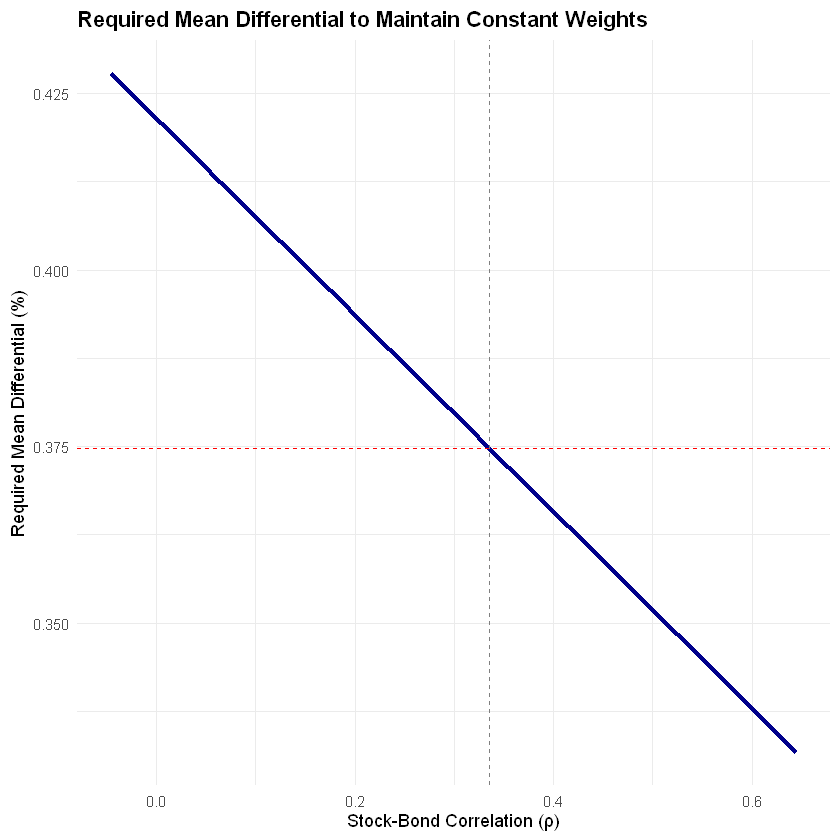

In [11]:
# Question 2.3) Mean Differential Analysis

# Target portfolio weight
w_eq_target <- 0.70
w_bond_target <- 0.30

# Initialize results
results_mean_diff <- data.frame(
  Correlation = corr_range,
  Required_Mean_Diff = NA,
  Required_Equity_Mean = NA,
  Required_Bond_Mean = NA
)

# Loop through correlations (taking correaltion range from previous part)
for (i in seq_along(corr_range)) {
  rho <- corr_range[i]
  
  # Recalculate covariance for this correlation
  cov_at_rho <- rho * sd_eq_real * sd_bond_real
  
  # The equation for mean differential(based on slides)
  # (μ_eq - μ_bond) = gamma * [w_eq*(σ²_eq + σ²_bond - 2*cov) - (σ²_bond - cov)]
  
  required_mean_diff <- gamma * (
    w_eq_target * (sd_eq_real^2 + sd_bond_real^2 - 2 * cov_at_rho) - 
    (sd_bond_real^2 - cov_at_rho)
  )
  
  # Store results
  results_mean_diff$Required_Mean_Diff[i] <- required_mean_diff
  results_mean_diff$Required_Equity_Mean[i] <- mu_bond_real + required_mean_diff
  results_mean_diff$Required_Bond_Mean[i] <- mu_bond_real
}

# Plot: Required Mean Differential vs. Correlation
ggplot(results_mean_diff, aes(x = Correlation, y = Required_Mean_Diff * 100)) +
  geom_line(color = "darkblue", size = 1.2) +
  geom_hline(yintercept = (mu_eq_real - mu_bond_real) * 100, 
             linetype = "dashed", color = "red") +
  geom_vline(xintercept = corr_eq_bond, 
             linetype = "dashed", color = "gray50") +
  labs(x = "Stock-Bond Correlation (ρ)",
       y = "Required Mean Differential (%)",
       title = "Required Mean Differential to Maintain Constant Weights") +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold"))


In [12]:
# Question 2.4) Optimal Portfolio using CRRA Utility function
# Loading the library with CRRA function
source("portUtility.R")

Rf_gross <- mean(1 + r_rf_real)  # gross risk-free rate time series

# Choose gamma and constraints
gamma_crra <- gamma        # same γ as in your MV analysis (or try other values)
minlev     <- 0           # minimum leverage in risky portfolio
maxlev     <- 2           # maximum leverage (e.g. up to 200% in risky + short RF)
lower_bnd  <- 0           # no short-selling of risky assets
upper_bnd  <- 1           # each asset at most 100% weight
n_starts   <- 10          # random starts for optimization (to avoid local optima)

# CRRA-optimal weights with risk-free asset, using historical simulation
w_crra <- portCRRA(
  data   = data2_excess_ret,        # excess return data (T x n)
  Rf     = Rf_gross,         # gross risk-free rate
  model  = "hist",           # historical simulation
  gamma  = gamma_crra,       # CRRA coefficient
  minlev = minlev,
  maxlev = maxlev,
  lower  = lower_bnd,
  upper  = upper_bnd,
  n_opts = n_starts
)

t(round(w_crra, digits = 4)) # Printing the optimal weights on equity and bond

w_rf_crra <- 1 - sum(w_crra) # Investment weight on risk free assets
print(paste("Risk Free Asset Weight(CRRA):",round(w_rf_crra, digits = 4)))

# Historical portfolio *gross* return per period for CRRA portfolio
port_gross_crra <- Rf_gross + as.numeric(as.matrix(data2_excess_ret) %*% w_crra)

# Check for any non-positive values (CRRA utility needs W > 0)
summary(port_gross_crra)

# Certainty equivalent under CRRA, using historical simulation
CE_crra <- function(gross_returns, gamma) {
  util <- gross_returns^(1 - gamma)
  (mean(util))^(1 / (1 - gamma))
}

ce_crra <- CE_crra(port_gross_crra, gamma_crra)

# Also compute mean, sd, and Sharpe for comparison
mu_crra    <- mean(port_gross_crra - 1)              # mean *excess* over 0
sd_crra    <- sd(port_gross_crra - 1)
sharpe_crra <- (mu_crra - (Rf_gross - 1)) / sd_crra  # vs risk-free

list(
  weights_risky = w_crra,
  weight_rf     = w_rf_crra,
  CE_CRRA       = ce_crra,
  mean_CRRA     = mu_crra,
  sd_CRRA       = sd_crra,
  sharpe_CRRA   = sharpe_crra
)


r_eq_real,r_bond_real
0.6769,0.5156


[1] "Risk Free Asset Weight(CRRA): -0.1925"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.8455  0.9874  1.0065  1.0048  1.0232  1.1081 

$weights_risky
  r_eq_real r_bond_real 
  0.6769031   0.5156127 

$weight_rf
[1] -0.1925158

$CE_CRRA
[1] 1.002566

$mean_CRRA
[1] 0.004831212

$sd_CRRA
[1] 0.03151227

$sharpe_CRRA
[1] 0.1465031

In [13]:
# 2.5 a) Selcect the assets and construct optiomal portfolio with and without risk free asset
 assets_data <- data[2:nrow(data),c("Date","dvlp_eq","emrg_eq","wrld_eq","wrldx_gbnd","wlrd_gbnd","us_t1m","us_infl")]
assets_data[, 2:5] <- assets_data[, 2:5] / 100

# Calculating the real returns
dvlp_eq_real   <- (1 + assets_data$dvlp_eq)   / (1 + assets_data$us_infl) - 1
emrg_eq_real   <- (1 + assets_data$emrg_eq)   / (1 + assets_data$us_infl) - 1
wrld_eq_real   <- (1 + assets_data$wrld_eq)   / (1 + assets_data$us_infl) - 1
wrldx_gbnd_real   <- (1 + assets_data$wrldx_gbnd)   / (1 + assets_data$us_infl) - 1
wlrd_gbnd_real   <- (1 + assets_data$wlrd_gbnd)   / (1 + assets_data$us_infl) - 1
rf_real <- (1 + assets_data$us_t1m)   / (1 + assets_data$us_infl) - 1

# calculatin the excess return
dvlp_excess <- dvlp_eq_real - rf_real
emrg_excess <- emrg_eq_real - rf_real
wrld_excess <- wrld_eq_real - rf_real
wrldx_gbnd_excess <- wrldx_gbnd_real - rf_real
wlrd_gbnd_excess <- wlrd_gbnd_real - rf_real

# Creating a data fram of excees returns
excess_data <- data.frame(dvlp_excess, emrg_excess, wrld_excess, wrldx_gbnd_excess, wlrd_gbnd_excess)

# Computing the mean vector and covariance matrix of excess returns
Mu_assets <- colMeans(excess_data) # mean vector of excess returns
Sigma_assets <- cov(excess_data) # covariance matrix

# Computing optimal weights(Risky Assets, Unconstrained MV, wihout risk free asset)
w_unc_norf <- uncTangent(Mu_assets, Sigma_assets)
t(round(w_unc_norf,3))

# Time series return of unconstranined tangent portfolio
##ret_tangent_unc2 <-  w_unc_norf["dvlp_excess"]*dvlp_eq_real + w_unc_norf["emrg_excess"]*emrg_eq_real + w_unc_norf["wrld_excess"]*wrld_eq_real + w_unc_norf["wrldx_gbnd_excess"]*wrldx_gbnd_real + w_unc_norf["wlrd_gbnd_excess"]*wlrd_gbnd_real

ret_tangent_unc2 <- as.matrix(excess_data) %*% w_unc_norf

mu_tan2 <- mean(ret_tangent_unc2)
var_tan2 <- var(ret_tangent_unc2)
sd_tan2 <- sqrt(var_tan2)
SR_tan2 <- (mu_tan2 - mean(rf_real)) / sd_tan2

# Optimal portfolio allocation to  risky assets(considering risk free asset)
w_opt2 = (mu_tan2 - mean(rf_real)) / (gamma * var_tan2)
print("The optimal allocation to the risk asset is:")
print(w_opt2)

dvlp_excess,emrg_excess,wrld_excess,wrldx_gbnd_excess,wlrd_gbnd_excess
-0.308,0.117,-0.578,1.787,-0.018


[1] "The optimal allocation to the risk asset is:"
          [,1]
[1,] -2.279105


In [12]:
mu_tan2

[1] -0.2431134


PORTFOLIO OPTIMIZATION ANALYSIS (REAL RETURNS)

Data loaded successfully.
Sample size: 912 observations

PART 1: ORIGINAL ASSET SET (US Equity + 10-Year Bonds)

Summary Statistics (REAL RETURNS):
-----------------------------------

Mean Real Excess Returns (% per month):
   us_eq_excess us_t10yr_excess 
      0.6361911       0.1240327 

Standard Deviations (% per month):
   us_eq_excess us_t10yr_excess 
       4.298290        2.032202 

Correlation Matrix:
                us_eq_excess us_t10yr_excess
us_eq_excess      1.00000000      0.08547209
us_t10yr_excess   0.08547209      1.00000000

--- WITHOUT Risk-Free Asset ---

Tangency Portfolio Weights:
   us_eq_excess us_t10yr_excess 
         0.5825          0.4175 

Tangency Portfolio Performance:
  Expected excess return: 0.4224% per month
  Standard deviation:     2.7115% per month
  Sharpe Ratio:           0.1479

Optimal allocation to risky portfolio (gamma=4.4): 1.2280
Individual asset weights:


Warning message in w_opt_orig * w_unc_norf_orig:
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead."


[1] 0.7153409 0.5126550

Certainty Equivalent (without rf): 0.2725% per month

--- WITH Risk-Free Asset ---
Optimal allocation to risky portfolio: 1.2280
Allocation to risk-free: -0.2280

Certainty Equivalent (with rf): 0.2940% per month
Improvement: 0.0215% per month


PART 2: SELECTED ASSET SET (5 Assets)

ASSET SELECTION RATIONALE:
--------------------------

1. Developed Markets Equity (dvlp_eq): International equity diversification
2. Emerging Markets Equity (emrg_eq): Higher growth potential
3. World Equity (wrld_eq): Global equity exposure
4. World ex-US Government Bonds (wrldx_gbnd): International fixed income
5. World Government Bonds (wlrd_gbnd): Global government bond exposure

Summary Statistics (REAL RETURNS):
-----------------------------------

Mean Real Excess Returns (% per month):
      dvlp_excess       emrg_excess       wrld_excess wrldx_gbnd_excess 
        0.4989834         0.5689501         0.5491877         0.1980939 
 wlrd_gbnd_excess 
        0.1743902 

Stand

Warning message in w_opt2 * w_unc_norf:
"Recycling array of length 1 in array-vector arithmetic is deprecated.
  Use c() or as.vector() instead."


[1] -0.2365173  0.1677477  0.7704666 -0.6040567  1.2496974

Certainty Equivalent (without rf): 0.2639% per month

--- WITH Risk-Free Asset ---
Optimal allocation to risky portfolio: 1.3473
Allocation to risk-free: -0.3473

Certainty Equivalent (with rf): 0.2853% per month
Improvement: 0.0215% per month


COMPARISON SUMMARY (REAL RETURNS)

CERTAINTY EQUIVALENTS:
Original - Without RF: 0.2725% per month
Original - With RF:    0.2940% per month
Selected - Without RF: 0.2639% per month
Selected - With RF:    0.2853% per month

Benefit of diversification (without RF): -0.0086% per month
Benefit of diversification (with RF):    -0.0086% per month

SHARPE RATIOS:
Original: 0.1479
Selected: 0.1445
Improvement: -0.0034 (-2.30%)


Generating efficient frontiers...

Efficient frontiers generated successfully!


SUMMARY STATISTICS

ORIGINAL SET:
  Sharpe Ratio: 0.1479
  Return: 0.4224% per month (5.07% annualized)
  Volatility: 2.7115% per month
  CE (with RF): 0.2940% per month

SELECTED SET:
  S

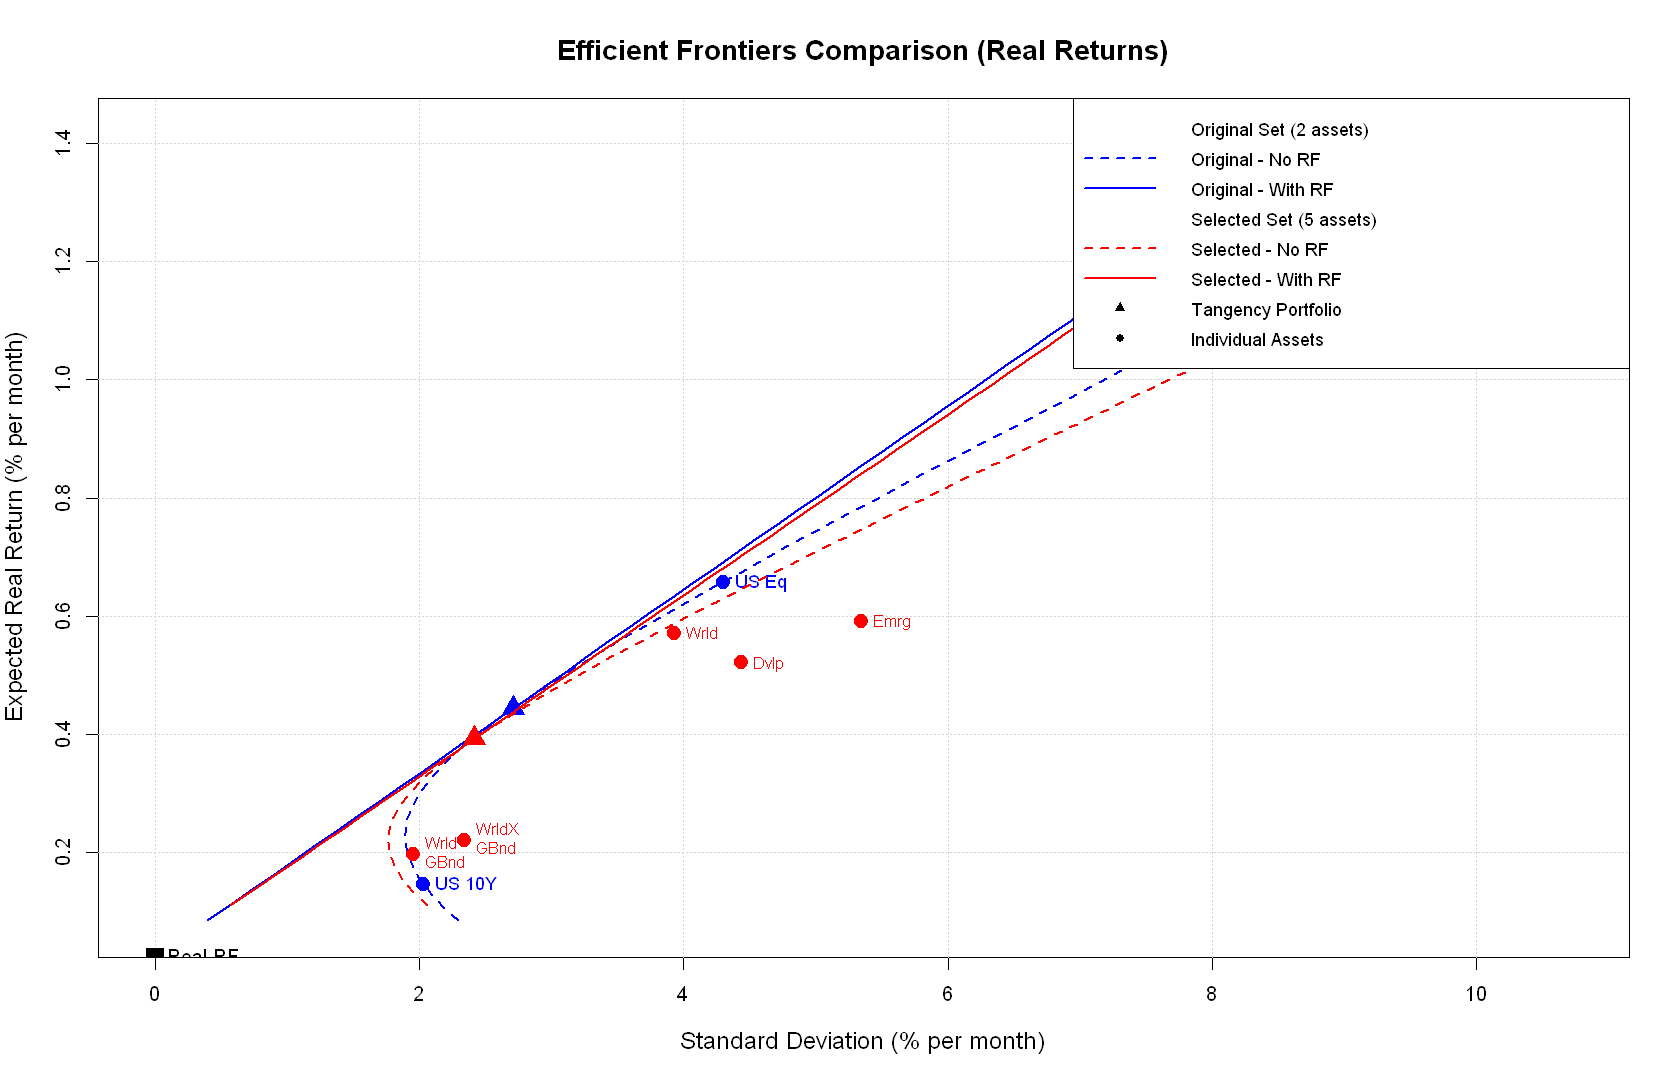

In [14]:
# 2.5 Redone
cat("\n================================================================\n")
cat("PORTFOLIO OPTIMIZATION ANALYSIS (REAL RETURNS)\n")
cat("================================================================\n\n")

# Load data
data <- read_excel("GRA65602_project data_Fall2025.xlsx", 
                   sheet='csv')

col_names <- c('Date', 'us_eq', 'us_t1m', 'us_t1yr', 'us_t2yr', 'us_t5yr', 
               'us_t7yr', 'us_t10yr', 'us_t20yr', 'us_t30yr',
               'us_size_q1', 'us_size_q5', 'us_btm_q1', 'us_btm_q5',
               'us_mom_q1', 'us_mom_q5', 'us_NoDur', 'us_Durbl', 'us_Manuf',
               'us_Enrgy', 'us_Chems', 'us_BusEq', 'us_Telcm', 'us_Utils',
               'us_Shops', 'us_Hlth', 'us_Money', 'us_Other',
               'dvlp_eq', 'emrg_eq', 'wrld_eq', 'wlrd_gbnd', 'wrldx_gbnd',
               'dow_cbnd', 'com_ind', 'oil')

colnames(data)[1:36] <- col_names
colnames(data)[38] <- 'us_infl'

# Convert to numeric
for(col in c(col_names[2:36], 'us_infl')) {
  data[[col]] <- as.numeric(data[[col]])
}

# Remove rows with missing data
data <- data[complete.cases(data[, c('Date', 'us_eq', 'us_t1m', 'us_t10yr', 'us_infl')]), ]

cat("Data loaded successfully.\n")
cat(sprintf("Sample size: %d observations\n\n", nrow(data)))

# Risk aversion parameter
gamma <- gamma

# ================================================================
# PART 1: ORIGINAL ASSET SET (US Equity + 10-Year Bonds)
# ================================================================
cat("================================================================\n")
cat("PART 1: ORIGINAL ASSET SET (US Equity + 10-Year Bonds)\n")
cat("================================================================\n\n")

# Select original assets data
orig_data <- data[, c("Date", "us_eq", "us_t10yr", "us_t1m", "us_infl")]
orig_data <- orig_data[complete.cases(orig_data), ]

# Convert returns to decimal (already in percentage form)
orig_data$us_eq <- orig_data$us_eq / 100
orig_data$us_t10yr <- orig_data$us_t10yr / 100
orig_data$us_t1m <- orig_data$us_t1m / 100
orig_data$us_infl <- orig_data$us_infl / 100

# Calculate REAL returns using your formula: (1 + nominal) / (1 + inflation) - 1
us_eq_real <- (1 + orig_data$us_eq) / (1 + orig_data$us_infl) - 1
us_t10yr_real <- (1 + orig_data$us_t10yr) / (1 + orig_data$us_infl) - 1
rf_real_orig <- (1 + orig_data$us_t1m) / (1 + orig_data$us_infl) - 1

# Calculate excess returns
us_eq_excess <- us_eq_real - rf_real_orig
us_t10yr_excess <- us_t10yr_real - rf_real_orig

# Create data frame of excess returns
excess_data_orig <- data.frame(us_eq_excess, us_t10yr_excess)

# Compute mean vector and covariance matrix
Mu_orig <- colMeans(excess_data_orig)
Sigma_orig <- cov(excess_data_orig)

cat("Summary Statistics (REAL RETURNS):\n")
cat("-----------------------------------\n")
cat("\nMean Real Excess Returns (% per month):\n")
print(Mu_orig * 100)
cat("\nStandard Deviations (% per month):\n")
print(sqrt(diag(Sigma_orig)) * 100)
cat("\nCorrelation Matrix:\n")
print(cor(excess_data_orig))

# Compute optimal weights (without risk-free asset)
cat("\n--- WITHOUT Risk-Free Asset ---\n")
w_unc_norf_orig <- uncTangent(Mu_orig, Sigma_orig)
cat("\nTangency Portfolio Weights:\n")
print(round(w_unc_norf_orig, 4))

# Time series return of unconstrained tangent portfolio
ret_tangent_unc_orig <- as.matrix(excess_data_orig) %*% w_unc_norf_orig

mu_tan_orig <- mean(ret_tangent_unc_orig)
var_tan_orig <- var(ret_tangent_unc_orig)
sd_tan_orig <- sqrt(var_tan_orig)
SR_tan_orig <- (mu_tan_orig - mean(rf_real_orig)) / sd_tan_orig

cat(sprintf("\nTangency Portfolio Performance:\n"))
cat(sprintf("  Expected excess return: %.4f%% per month\n", mu_tan_orig * 100))
cat(sprintf("  Standard deviation:     %.4f%% per month\n", sd_tan_orig * 100))
cat(sprintf("  Sharpe Ratio:           %.4f\n", SR_tan_orig))

# Optimal portfolio allocation to risky assets (considering risk-free asset)
w_opt_orig <- (mu_tan_orig - mean(rf_real_orig)) / (gamma * var_tan_orig)
cat(sprintf("\nOptimal allocation to risky portfolio (gamma=%.1f): %.4f\n", gamma, w_opt_orig))
cat("Individual asset weights:\n")
print(w_opt_orig * w_unc_norf_orig)

# Certainty Equivalent without RF
CE_norf_orig <- w_opt_orig * mu_tan_orig - 0.5 * gamma * (w_opt_orig^2) * var_tan_orig
cat(sprintf("\nCertainty Equivalent (without rf): %.4f%% per month\n", CE_norf_orig * 100))

# Certainty Equivalent with RF
cat("\n--- WITH Risk-Free Asset ---\n")
cat(sprintf("Optimal allocation to risky portfolio: %.4f\n", w_opt_orig))
cat(sprintf("Allocation to risk-free: %.4f\n", 1 - w_opt_orig))

CE_rf_orig <- mean(rf_real_orig) + w_opt_orig * mu_tan_orig - 
              0.5 * gamma * (w_opt_orig^2) * var_tan_orig
cat(sprintf("\nCertainty Equivalent (with rf): %.4f%% per month\n", CE_rf_orig * 100))
cat(sprintf("Improvement: %.4f%% per month\n", (CE_rf_orig - CE_norf_orig) * 100))

# ================================================================
# PART 2: SELECTED ASSET SET (5 Assets)
# ================================================================
cat("\n\n================================================================\n")
cat("PART 2: SELECTED ASSET SET (5 Assets)\n")
cat("================================================================\n\n")

cat("ASSET SELECTION RATIONALE:\n")
cat("--------------------------\n\n")
cat("1. Developed Markets Equity (dvlp_eq): International equity diversification\n")
cat("2. Emerging Markets Equity (emrg_eq): Higher growth potential\n")
cat("3. World Equity (wrld_eq): Global equity exposure\n")
cat("4. World ex-US Government Bonds (wrldx_gbnd): International fixed income\n")
cat("5. World Government Bonds (wlrd_gbnd): Global government bond exposure\n\n")

# Select assets data (matching your code exactly)
assets_data <- data[, c("Date", "dvlp_eq", "emrg_eq", "wrld_eq", "wrldx_gbnd", "wlrd_gbnd", "us_t1m", "us_infl")]
assets_data <- assets_data[complete.cases(assets_data), ]

# Convert to decimal (matching your code)
assets_data[, 2:7] <- assets_data[, 2:7] / 100
assets_data$us_infl <- assets_data$us_infl / 100

# Calculating the real returns (using your formula)
dvlp_eq_real <- (1 + assets_data$dvlp_eq) / (1 + assets_data$us_infl) - 1
emrg_eq_real <- (1 + assets_data$emrg_eq) / (1 + assets_data$us_infl) - 1
wrld_eq_real <- (1 + assets_data$wrld_eq) / (1 + assets_data$us_infl) - 1
wrldx_gbnd_real <- (1 + assets_data$wrldx_gbnd) / (1 + assets_data$us_infl) - 1
wlrd_gbnd_real <- (1 + assets_data$wlrd_gbnd) / (1 + assets_data$us_infl) - 1
rf_real <- (1 + assets_data$us_t1m) / (1 + assets_data$us_infl) - 1

# Calculating the excess returns
dvlp_excess <- dvlp_eq_real - rf_real
emrg_excess <- emrg_eq_real - rf_real
wrld_excess <- wrld_eq_real - rf_real
wrldx_gbnd_excess <- wrldx_gbnd_real - rf_real
wlrd_gbnd_excess <- wlrd_gbnd_real - rf_real

# Creating a data frame of excess returns
excess_data <- data.frame(dvlp_excess, emrg_excess, wrld_excess, wrldx_gbnd_excess, wlrd_gbnd_excess)

# Computing the mean vector and covariance matrix of excess returns
Mu_assets <- colMeans(excess_data)
Sigma_assets <- cov(excess_data)

cat("Summary Statistics (REAL RETURNS):\n")
cat("-----------------------------------\n")
cat("\nMean Real Excess Returns (% per month):\n")
print(Mu_assets * 100)
cat("\nStandard Deviations (% per month):\n")
print(sqrt(diag(Sigma_assets)) * 100)
cat("\nCorrelation Matrix:\n")
print(round(cor(excess_data), 3))

# Computing optimal weights (Risky Assets, Unconstrained MV, without risk-free asset)
cat("\n--- WITHOUT Risk-Free Asset ---\n")
w_unc_norf <- uncTangent(Mu_assets, Sigma_assets)
cat("\nTangency Portfolio Weights:\n")
print(round(w_unc_norf, 4))

# Time series return of unconstrained tangent portfolio
ret_tangent_unc2 <- as.matrix(excess_data) %*% w_unc_norf

mu_tan2 <- mean(ret_tangent_unc2)
var_tan2 <- var(ret_tangent_unc2)
sd_tan2 <- sqrt(var_tan2)
SR_tan2 <- (mu_tan2 - mean(rf_real)) / sd_tan2

cat(sprintf("\nTangency Portfolio Performance:\n"))
cat(sprintf("  Expected excess return: %.4f%% per month\n", mu_tan2 * 100))
cat(sprintf("  Standard deviation:     %.4f%% per month\n", sd_tan2 * 100))
cat(sprintf("  Sharpe Ratio:           %.4f\n", SR_tan2))

# Optimal portfolio allocation to risky assets (considering risk-free asset)
w_opt2 <- (mu_tan2 - mean(rf_real)) / (gamma * var_tan2)
cat(sprintf("\nOptimal allocation to risky portfolio (gamma=%.1f): %.4f\n", gamma, w_opt2))
cat("Individual asset weights:\n")
print(w_opt2 * w_unc_norf)

# Certainty Equivalent without RF
CE_norf2 <- w_opt2 * mu_tan2 - 0.5 * gamma * (w_opt2^2) * var_tan2
cat(sprintf("\nCertainty Equivalent (without rf): %.4f%% per month\n", CE_norf2 * 100))

# Certainty Equivalent with RF
cat("\n--- WITH Risk-Free Asset ---\n")
cat(sprintf("Optimal allocation to risky portfolio: %.4f\n", w_opt2))
cat(sprintf("Allocation to risk-free: %.4f\n", 1 - w_opt2))

CE_rf2 <- mean(rf_real) + w_opt2 * mu_tan2 - 
          0.5 * gamma * (w_opt2^2) * var_tan2
cat(sprintf("\nCertainty Equivalent (with rf): %.4f%% per month\n", CE_rf2 * 100))
cat(sprintf("Improvement: %.4f%% per month\n", (CE_rf2 - CE_norf2) * 100))

# ================================================================
# COMPARISON SUMMARY
# ================================================================
cat("\n\n================================================================\n")
cat("COMPARISON SUMMARY (REAL RETURNS)\n")
cat("================================================================\n\n")

cat("CERTAINTY EQUIVALENTS:\n")
cat(sprintf("Original - Without RF: %.4f%% per month\n", CE_norf_orig * 100))
cat(sprintf("Original - With RF:    %.4f%% per month\n", CE_rf_orig * 100))
cat(sprintf("Selected - Without RF: %.4f%% per month\n", CE_norf2 * 100))
cat(sprintf("Selected - With RF:    %.4f%% per month\n\n", CE_rf2 * 100))

cat(sprintf("Benefit of diversification (without RF): %.4f%% per month\n", 
    (CE_norf2 - CE_norf_orig) * 100))
cat(sprintf("Benefit of diversification (with RF):    %.4f%% per month\n\n", 
    (CE_rf2 - CE_rf_orig) * 100))

cat("SHARPE RATIOS:\n")
cat(sprintf("Original: %.4f\n", SR_tan_orig))
cat(sprintf("Selected: %.4f\n", SR_tan2))
cat(sprintf("Improvement: %.4f (%.2f%%)\n", 
    SR_tan2 - SR_tan_orig,
    (SR_tan2 / SR_tan_orig - 1) * 100))

# ================================================================
# EFFICIENT FRONTIER CONSTRUCTION
# ================================================================
cat("\n\nGenerating efficient frontiers...\n")

rf_rate <- mean(rf_real)

# For ORIGINAL set
range_mu_orig <- seq(from=min(Mu_orig)*0.5, to=max(Mu_orig)*2, length.out=50)
M_orig <- matrix(NA, nrow=50, ncol=4)

for (i in 1:50){
  mu <- range_mu_orig[i]
  tryCatch({
    w <- uncMeanVar_mu(Mu_orig, Sigma_orig, mu)
    mu_port <- sum(w * Mu_orig)
    sd_port <- sqrt(t(w) %*% Sigma_orig %*% w)
    lev <- mu / mu_tan_orig
    M_orig[i,] <- c(rf_rate + mu_port, sd_port, rf_rate + mu, sd_tan_orig * lev)
  }, error = function(e) NULL)
}

# For SELECTED set
range_mu_sel <- seq(from=min(Mu_assets)*0.5, to=max(Mu_assets)*2, length.out=50)
M_sel <- matrix(NA, nrow=50, ncol=4)

for (i in 1:50){
  mu <- range_mu_sel[i]
  tryCatch({
    w <- uncMeanVar_mu(Mu_assets, Sigma_assets, mu)
    mu_port <- sum(w * Mu_assets)
    sd_port <- sqrt(t(w) %*% Sigma_assets %*% w)
    lev <- mu / mu_tan2
    M_sel[i,] <- c(rf_rate + mu_port, sd_port, rf_rate + mu, sd_tan2 * lev)
  }, error = function(e) NULL)
}

cat("\nEfficient frontiers generated successfully!\n")

# ================================================================
# PLOT EFFICIENT FRONTIERS IN NOTEBOOK
# ================================================================

# Set plot size for notebook
options(repr.plot.width=14, repr.plot.height=9)

# Convert to percentages for better readability
M_orig_pct <- M_orig * 100
M_sel_pct <- M_sel * 100

# Get plot ranges
all_sd <- c(M_orig_pct[,2], M_sel_pct[,2], M_orig_pct[,4], M_sel_pct[,4])
all_mu <- c(M_orig_pct[,1], M_sel_pct[,1], M_orig_pct[,3], M_sel_pct[,3])

# Initialize empty plot
plot(NULL, NULL,
     xlim=c(0, max(all_sd, na.rm=TRUE) * 1.1),
     ylim=c(min(all_mu, na.rm=TRUE) * 0.9, max(all_mu, na.rm=TRUE) * 1.1),
     xlab="Standard Deviation (% per month)",
     ylab="Expected Real Return (% per month)",
     main="Efficient Frontiers Comparison (Real Returns)",
     cex.lab=1.2, cex.main=1.4)

grid(col="lightgray", lty="dotted")

# ORIGINAL SET (Blue)
# Individual assets
orig_assets_sd <- sqrt(diag(Sigma_orig)) * 100
orig_assets_mu <- (Mu_orig + rf_rate) * 100
points(orig_assets_sd, orig_assets_mu, pch=19, col="blue", cex=1.5)
text(orig_assets_sd, orig_assets_mu, 
     labels=c("US Eq", "US 10Y"), pos=4, col="blue", cex=0.9)

# Efficient frontier without RF
lines(M_orig_pct[,2], M_orig_pct[,1], col="blue", lwd=2, lty=2)

# Capital Market Line (with RF)
lines(M_orig_pct[,4], M_orig_pct[,3], col="blue", lwd=2, lty=1)

# Tangency portfolio
points(sd_tan_orig * 100, (rf_rate + mu_tan_orig) * 100, 
       pch=17, col="blue", cex=2)

# SELECTED SET (Red)
# Individual assets
sel_assets_sd <- sqrt(diag(Sigma_assets)) * 100
sel_assets_mu <- (Mu_assets + rf_rate) * 100
points(sel_assets_sd, sel_assets_mu, pch=19, col="red", cex=1.5)
text(sel_assets_sd, sel_assets_mu,
     labels=c("Dvlp", "Emrg", "Wrld", "WrldX\nGBnd", "Wrld\nGBnd"),
     pos=4, col="red", cex=0.8)

# Efficient frontier without RF
lines(M_sel_pct[,2], M_sel_pct[,1], col="red", lwd=2, lty=2)

# Capital Market Line (with RF)
lines(M_sel_pct[,4], M_sel_pct[,3], col="red", lwd=2, lty=1)

# Tangency portfolio
points(sd_tan2 * 100, (rf_rate + mu_tan2) * 100, 
       pch=17, col="red", cex=2)

# Risk-free rate
points(0, rf_rate * 100, pch=15, col="black", cex=2)
text(0, rf_rate * 100, labels="Real RF", pos=4, col="black")

# Legend
legend("topright", 
       legend=c("Original Set (2 assets)",
                "Original - No RF",
                "Original - With RF",
                "Selected Set (5 assets)",
                "Selected - No RF", 
                "Selected - With RF",
                "Tangency Portfolio",
                "Individual Assets"),
       col=c("blue", "blue", "blue", "red", "red", "red", "black", "black"),
       lty=c(NA, 2, 1, NA, 2, 1, NA, NA),
       pch=c(NA, NA, NA, NA, NA, NA, 17, 19),
       lwd=c(NA, 2, 2, NA, 2, 2, NA, NA),
       cex=0.9,
       bg="white")

# Print summary statistics
cat("\n\n================================================================\n")
cat("SUMMARY STATISTICS\n")
cat("================================================================\n\n")

cat("ORIGINAL SET:\n")
cat(sprintf("  Sharpe Ratio: %.4f\n", SR_tan_orig))
cat(sprintf("  Return: %.4f%% per month (%.2f%% annualized)\n", 
    mu_tan_orig * 100, mu_tan_orig * 1200))
cat(sprintf("  Volatility: %.4f%% per month\n", sd_tan_orig * 100))
cat(sprintf("  CE (with RF): %.4f%% per month\n\n", CE_rf_orig * 100))

cat("SELECTED SET:\n")
cat(sprintf("  Sharpe Ratio: %.4f\n", SR_tan2))
cat(sprintf("  Return: %.4f%% per month (%.2f%% annualized)\n", 
    mu_tan2 * 100, mu_tan2 * 1200))
cat(sprintf("  Volatility: %.4f%% per month\n", sd_tan2 * 100))
cat(sprintf("  CE (with RF): %.4f%% per month\n\n", CE_rf2 * 100))

cat("COMPARISON:\n")
cat(sprintf("  Sharpe Ratio Difference: %.4f (%.2f%%)\n", 
    SR_tan2 - SR_tan_orig, (SR_tan2/SR_tan_orig - 1) * 100))
cat(sprintf("  CE Difference: %.4f%% per month (%.2f%% per year)\n", 
    (CE_rf2 - CE_rf_orig) * 100, (CE_rf2 - CE_rf_orig) * 1200))

In [15]:
# 3 i) 
#------------------------------
# Inputs form previous solution
#------------------------------
gamma <- gamma         # risk aversion
y     <- 0.25          # NTW share of total wealth


# Return on Non Tradable Wealth
ntw_ret <- data$oil / 100
ntw_ret_real <- (1 + ntw_ret) / (1 + data$us_infl / 100) - 1
ntw_excess <- ntw_ret_real - rf_real

# Combine NTW excess returns with the risky excess returns
df_all <- cbind(
  data2_excess_ret,          # columns: equity_excess, bond_excess
  ntw_excess = ntw_excess    # column: oil excess return
)

# Drop all rows that contain ANY NA (this simultaneously removes NAs in oil)
df_all <- na.omit(df_all)

# Splitting back into aligned objects
data2_excess_ret2 <- df_all[, c("r_eq_real", "r_bond_real")]
ntw_excess2       <- df_all[, "ntw_excess"]


# Benchmark strategy from Part 2 (growth / myopic portfolio)
wEquity      <- 0.70
wBonds       <- 0.30
wBenchmark   <- c(wEquity, wBonds)

gamma        <- gamma 

# Tradeable risky assets: Excess returns
data_risky        <- data2_excess_ret2 # data frame of excess equity and bond returns
colnames(data_risky) <- c("equity", "bonds")

# NTW: EXCESS return on oil (non-tradable)
rNtw         <- ntw_excess2   # excess oil return time series

# Moments of tradeable assets
mu           <- colMeans(data_risky)
sigma        <- cov(data_risky)

# Covariance between NTW and tradeable assets
sigmaN       <- cov(data_risky, rNtw)   # cov(Re, RN), length-2 vector
betaN        <- solve(sigma, sigmaN)

# NTW share
y            <- 0.25      # NTW = 25% of total wealth

# Myopic (growth) component: benchmark scaled to financial wealth (1 - y)
xMyopic      <- wBenchmark / (1 - y)

# Hedging component
xHedge       <- (y / (1 - y)) * betaN

# Unconstrained optimal risky weights (relative to FINANCIAL wealth)
xUnc         <- as.numeric(xMyopic - xHedge)   # DO NOT normalise

# Risk-free weight within financial wealth = 1 - sum(xUnc)
w_rf_fin     <- 1 - sum(xUnc)

# For reporting: risky weights relative to TOTAL wealth
w_fin        <- 1 - y    # 0.75
w_eq_total   <- w_fin * xUnc[1]
w_bd_total   <- w_fin * xUnc[2]
w_ntw_total  <- y
w_rf_total   <- 1 - (w_eq_total + w_bd_total + w_ntw_total)

# Portfolio statistics using total EXCESS returns
rPortfolio   <- as.matrix(data_risky) %*% xUnc           # excess on financial risky part
rTotal       <- y * rNtw + (1 - y) * rPortfolio     # total EXCESS return of whole fund

muUncNtw          <- mean(rTotal)
sdUncNtw          <- sd(rTotal)
sharpeRatioUncNtw <- muUncNtw / sdUncNtw

ceUncNTW          <- 1+ muUncNtw - 0.5 * gamma * sdUncNtw^2   # CE in excess-return terms

cat("Optimal weights under unconstrained ptf with NTW (relative to FINANCIAL wealth):\n")
print(round(xUnc, 4))
cat("\nTotal-wealth weights (Equity, Bonds, NTW, RF):\n")
print(round(c(w_eq_total, w_bd_total, w_ntw_total, w_rf_total), 4))

cat("\nmu =", round(muUncNtw, 4),
    "sd =", round(sdUncNtw, 4),
    "SR =", round(sharpeRatioUncNtw, 4),
    "CE =", round(ceUncNTW, 4), "\n")
cat("--------------------------------------------------------------------------------\n")



Optimal weights under unconstrained ptf with NTW (relative to FINANCIAL wealth):
[1] 0.7862 0.5638

Total-wealth weights (Equity, Bonds, NTW, RF):
[1]  0.5896  0.4229  0.2500 -0.2625

mu = 0.0056 sd = 0.0414 SR = 0.134 CE = 1.0017 
--------------------------------------------------------------------------------


In [16]:
#Q3 ii) Constrained optimal portfolio with NTW

library(matlib)

# Inputs from earlier
gamma <- gamma       # your RA
y     <- 0.25        # NTW share
rNtw  <- ntw_excess2 # excess return on oil(NTW)

# Risky excess returns (equity, bond)
Re <- data_risky

# NTW-adjusted risky excess returns
Re_adj <- (1 - y) * Re    # shrinked because only 75% of wealth is financial

# Effective mean vector and covariance matrix
Mu_adj    <- colMeans(Re_adj)
Sigma_adj <- cov(Re_adj)

# UseD professor’s constrained mean-variance optimizer
# lower = 0, upper = 1, solves: maximize μᵀx - .5γ xᵀ Σ x subject to 0 ≤ x ≤ 1 & sum(x) = 1
# but we must allow sum(x) ≤ 1, so we add RF inside financial wealth
# Trick: include RF implicitly by expanding upper bound

wCon <- conMeanVar(
  Mu    = Mu_adj,
  Sigma = Sigma_adj,
  target = "ra",
  t_val = gamma,
  lower = 0,
  upper = 1
)

# wCon are weights of risky assets within financial wealth (sum to 1)
xCon <- wCon

# Convert to total-wealth weights
w_fin <- (1 - y)

w_eq_total  <- w_fin * xCon[1]
w_bd_total  <- w_fin * xCon[2]
w_ntw_total <- y
w_rf_total  <- 1 - (w_eq_total + w_bd_total + w_ntw_total)

# Compute total excess return series
rPortfolio_con <- as.numeric(as.matrix(Re) %*% xCon)
rTotal_con     <- y * rNtw + (1 - y) * rPortfolio_con

muCon  <- mean(rTotal_con)
sdCon  <- sd(rTotal_con)
ceCon  <- 1+ muCon - 0.5 * gamma * sdCon^2

cat("Constrained optimal weights (financial wealth):\n")
print(round(xCon, 4))

cat("\nTotal-wealth weights:\n")
print(round(c(
  Equity = w_eq_total,
  Bond   = w_bd_total,
  NTW    = w_ntw_total,
  RF     = w_rf_total
), 4))

cat("\nCE_constrained =", round(ceCon, 6), "\n")


Constrained optimal weights (financial wealth):
equity  bonds 
0.3794 0.6206 

Total-wealth weights:
Equity.equity    Bond.bonds           NTW     RF.equity 
       0.2845        0.4655        0.2500        0.0000 

CE_constrained = 1.00195 


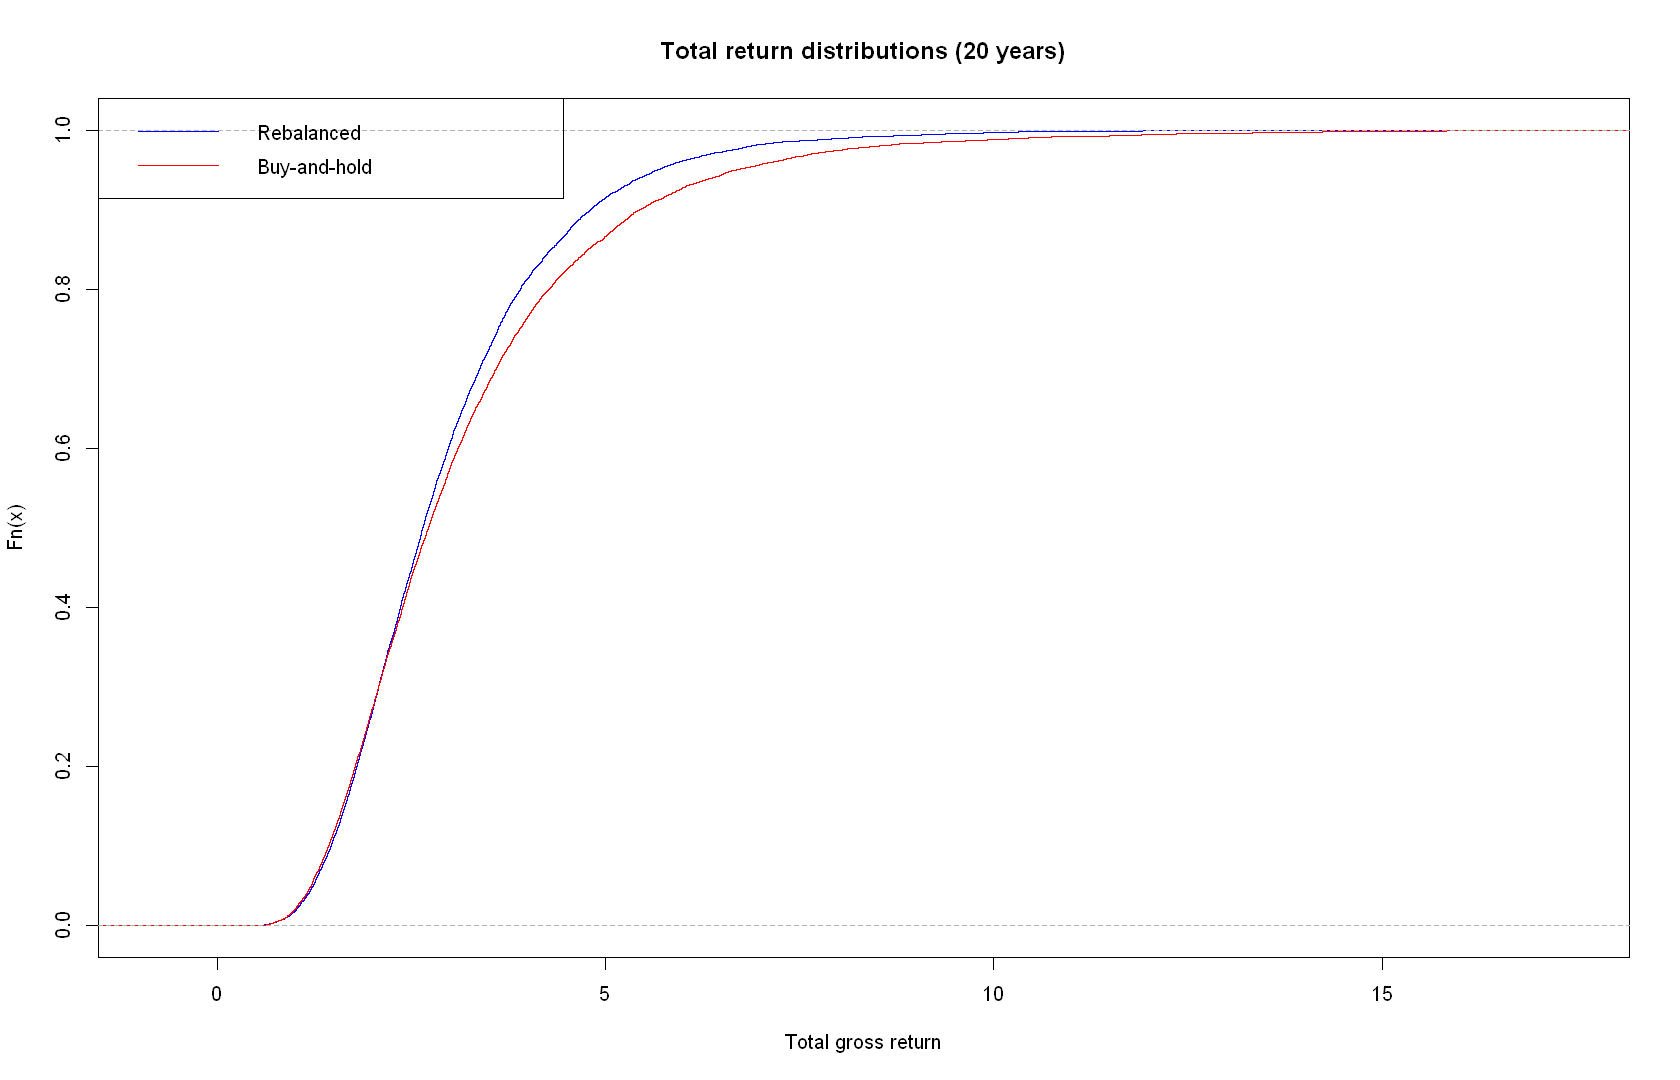

,Rebalanced,Buy-and-hold
Mean GM,0.40758,0.4070
Median GM,0.40701,0.4181
Std GM,0.19497,0.2194
Skew GM,0.01247,0.2134
Kurt GM,3.10171,3.1211
CE (total),1.81989,1.8137


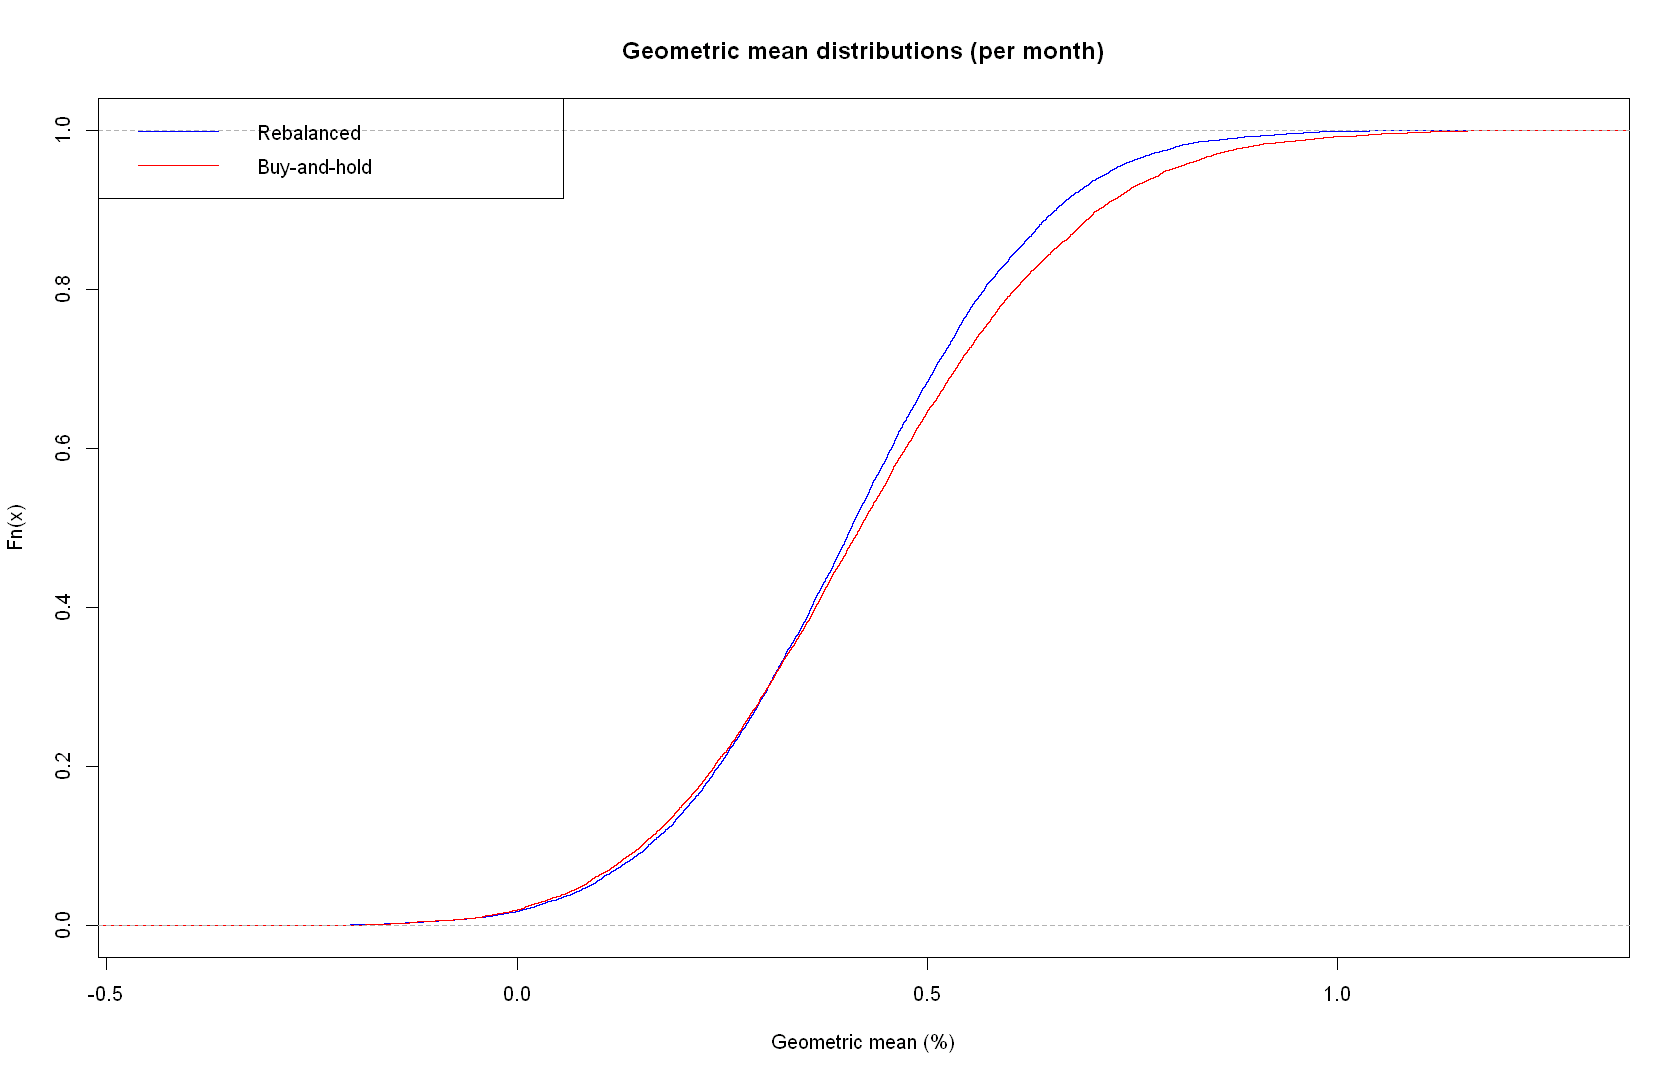

In [17]:
## -----------------------------
## 4.1 Rebalancing vs Buy-and-hold
## Constant IOS & log-normal returns, T = 20 years
## -----------------------------

library(MASS)
library(moments)

# Horizon in months: 20 years * 12
T_hor <- 20 * 12

# Number of simulation paths
N <- 10000
set.seed(1)

# Constant yield-to-maturity to add to excess returns (as in LR_invest)
yT  <- mean(r_rf_real)            # real risk-free rate

# Moments of log gross returns: log(1 + yT + excess)
Mu_ln    <- colMeans(log(1 + yT +data2_excess_ret ))
Sigma_ln <- cov(log(1 + yT + data2_excess_ret))

# Starting weights: unconstrained tangency portfolio from Part 2.2
#w_tan <- c(w1[1], w1[2])   # weights directly form part 2.2
optPort <- portCRRA_LT(data=1 + yT +data2_excess_ret, model="logn", T=T_hor, gamma=gamma, N=10000)
w_tan <- c(optPort$w[1],optPort$w[2])   # weights from the portCRRA_LT function
W_reb <- matrix(w_tan, ncol = 1)   # rebalanced portfolio weights
W_bnh <- matrix(w_tan, ncol = 1)   # buy-and-hold: same starting allocation

# Arrays to store simulated log total returns
r_reb <- numeric(N)   # rebalanced
r_bnh <- numeric(N)   # buy-and-hold

for (i in 1:N) {
  # Simulate T_hor months of log-normal gross returns for the two assets
  R <- exp(mvrnorm(T_hor, Mu_ln, Sigma_ln))  # T_hor x 2 matrix of gross returns
  r <- log(R)                                # log returns
  
  # Rebalanced strategy: each month rebalance back to w_tan
  # Portfolio gross return each month: R %*% W_reb (T_hor x 1)
  r_reb[i] <- sum(log(R %*% W_reb))
  
  # Buy-and-hold strategy: hold constant shares
  # Asset-level log total returns: colSums(r)
  # Final wealth = w_tan' * asset gross totals = w_tan' * exp(colSums(r))
  r_bnh[i] <- log(exp(colSums(r)) %*% W_bnh)
}

# Convert log total returns to horizon geometric means (per year, if you want)
gm_reb <- 100 * (exp(r_reb / T_hor) - 1)
gm_bnh <- 100 * (exp(r_bnh / T_hor) - 1)

# Plot distributions of total returns
ecdf_reb <- ecdf(exp(r_reb))
ecdf_bnh <- ecdf(exp(r_bnh))
plot(ecdf_reb, verticals = TRUE, do.points = FALSE,
     main = "Total return distributions (20 years)",
     col = "blue", xlab = "Total gross return")
plot(ecdf_bnh, verticals = TRUE, do.points = FALSE,
     add = TRUE, col = "red")
legend("topleft", legend = c("Rebalanced", "Buy-and-hold"),
       col = c("blue", "red"), lty = 1)

# Plot distributions of geometric means
ecdf_g_reb <- ecdf(gm_reb)
ecdf_g_bnh <- ecdf(gm_bnh)
plot(ecdf_g_reb, verticals = TRUE, do.points = FALSE,
     main = "Geometric mean distributions (per month)",
     col = "blue", xlab = "Geometric mean (%)")
plot(ecdf_g_bnh, verticals = TRUE, do.points = FALSE,
     add = TRUE, col = "red")
legend("topleft", legend = c("Rebalanced", "Buy-and-hold"),
       col = c("blue", "red"), lty = 1)

# Summary statistics (mean, median, std, skew, kurtosis, CE)
Stats_41 <- matrix(0, nrow = 6, ncol = 2)
colnames(Stats_41) <- c("Rebalanced", "Buy-and-hold")
rownames(Stats_41) <- c("Mean GM", "Median GM", "Std GM", "Skew GM", "Kurt GM", "CE (total)")

Stats_41[1, ] <- c(mean(gm_reb), median(gm_reb))
Stats_41[2, ] <- c(median(gm_reb), median(gm_bnh))
Stats_41[3, ] <- c(sd(gm_reb), sd(gm_bnh))
Stats_41[4, ] <- c(skewness(gm_reb), skewness(gm_bnh))
Stats_41[5, ] <- c(kurtosis(gm_reb), kurtosis(gm_bnh))

# Certainty equivalents (over full 20-year horizon, using CRRA gamma)
Stats_41[6, ] <- c(
  mean(exp((1 - gamma) * r_reb))^(1 / (1 - gamma)),
  mean(exp((1 - gamma) * r_bnh))^(1 / (1 - gamma))
)

options(digits = 4)
Stats_41


,Rebalanced,Buy-and-hold
Arithmetic mean,0.453,0.52478
Geometric mean,0.409,0.45460
Return volatility,2.951,3.72929
Mean stock weight,0.685,0.93108
Stock timing,0.000,-0.00469
Bond timing,0.000,-0.01536


,Decomposition:
Rebalancing premium,-0.04562
Volatility drag,0.02600
Mean weights,-0.09217
Stock timing,0.00469
Bond timing,0.01536
Total,-0.04612


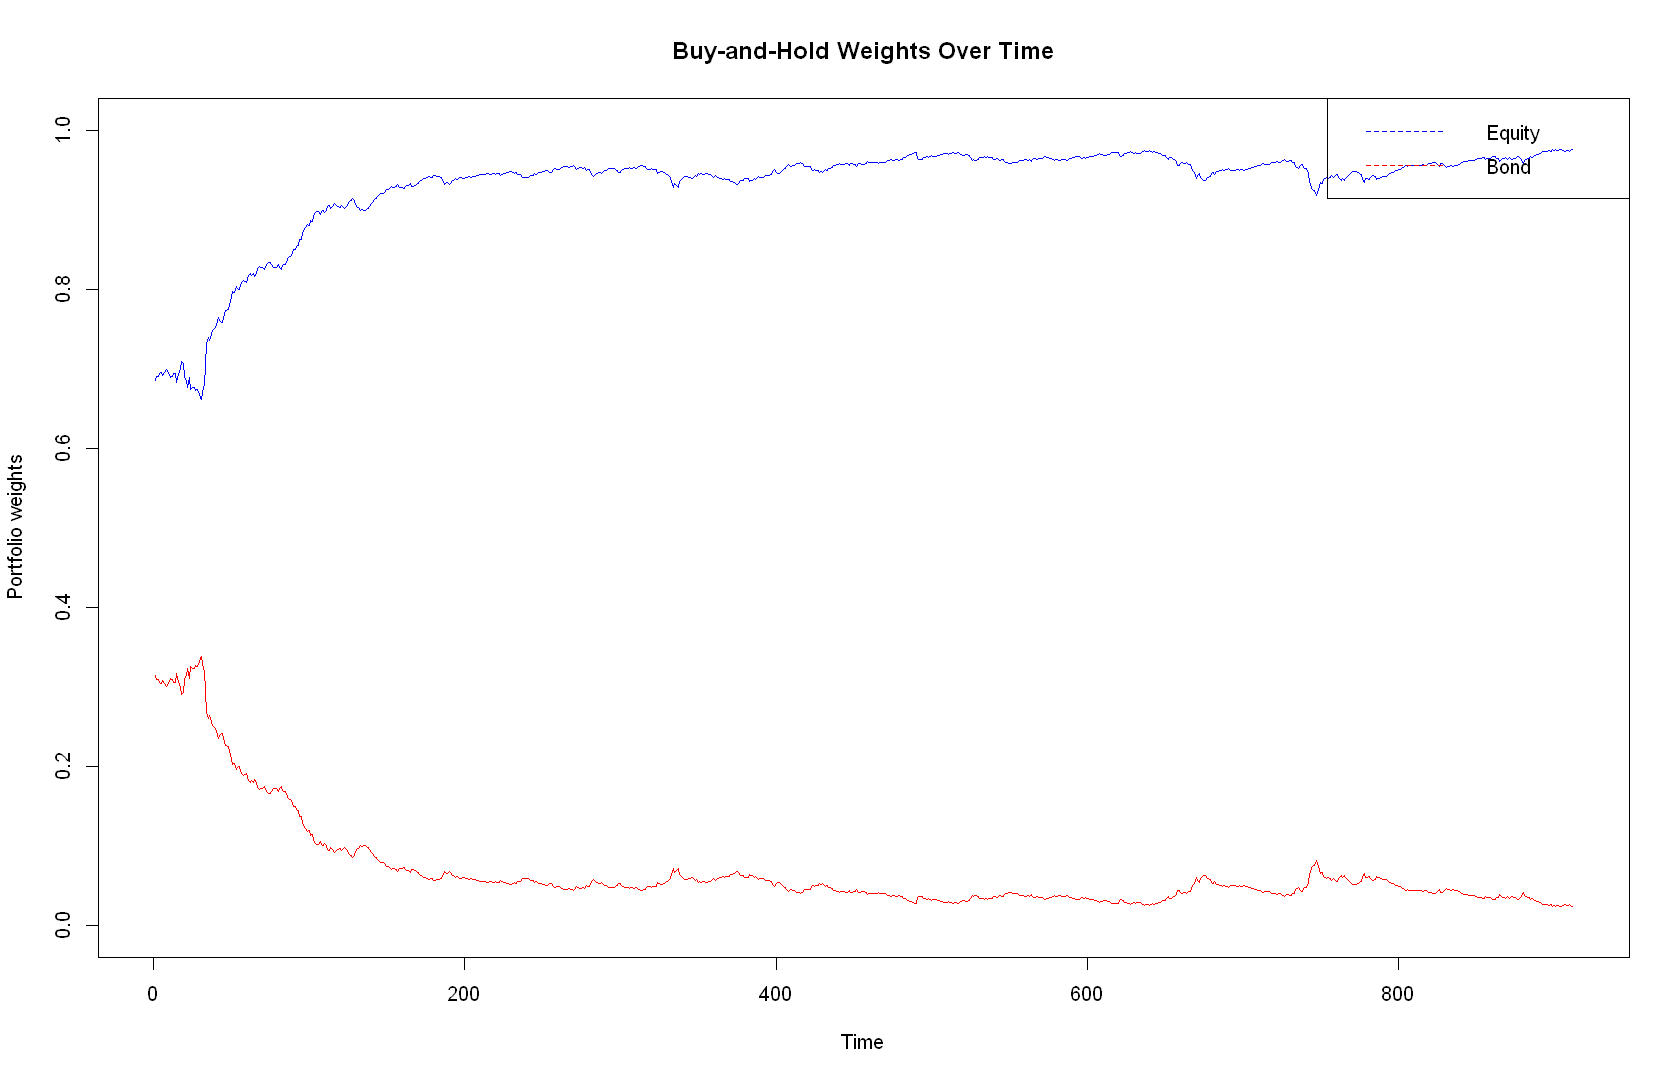

In [18]:
## -----------------------------
## 4.2 Historical rebalancing premium
## -----------------------------

# Using net monthly real returns for equity and bond
# data_ret: matrix n_periods x 2
data3 <- data.frame(r_eq_real = r_eq_real, r_bond_real = r_bond_real)
data_ret   <- as.matrix(data3)  # ensure matrix
n_periods  <- nrow(data_ret)

library(MASS)
library(moments)

# Calculation of Initial portfolio weights base on historical simulation (No Risk Free Asset)
optPort2 <- portCRRA_LT(data=1 + yT + data2_excess_ret, model="hist", T=T_hor, gamma=gamma, N=10000)
w_tan2 <- c(optPort$w[1],optPort$w[2])
W      <- as.numeric(w_tan2)   # c(w_eq_tan, w_bond_tan)
W_bnh  <- matrix(NA, nrow = n_periods, ncol = 2)
W_bnh[1, ] <- W

# Initial portfolio weights: tangency portfolio from Part 2.2
#W      <- as.numeric(w_tan)   # c(w_eq_tan, w_bond_tan)
#W_bnh  <- matrix(NA, nrow = n_periods, ncol = 2)
#W_bnh[1, ] <- W

## Rebalanced strategy: weights fixed at W each month
ret_reb <- data_ret %*% W
am_reb  <- mean(ret_reb)
gm_reb  <- exp(mean(log(1 + ret_reb))) - 1
vol_reb <- sd(ret_reb)

## Buy-and-hold strategy
ret_bnh <- matrix(NA, nrow = n_periods, ncol = 1)

for (t in 1:n_periods) {
  # One-step portfolio return
  ret_bnh[t] <- data_ret[t, ] %*% W_bnh[t, ]
  
  # Update weights for next period (shares unchanged, values drift)
  if (t < n_periods) {
    W_bnh[t + 1, ] <- (1 + data_ret[t, ]) * W_bnh[t, ]
    W_bnh[t + 1, ] <- W_bnh[t + 1, ] / sum(W_bnh[t + 1, ])
  }
}

am_bnh  <- mean(ret_bnh)
gm_bnh  <- exp(mean(log(1 + ret_bnh))) - 1
vol_bnh <- sd(ret_bnh)

## Summary statistics (as in LR_invest)
Stats_42 <- matrix(0, nrow = 6, ncol = 2)
colnames(Stats_42) <- c("Rebalanced", "Buy-and-hold")
rownames(Stats_42) <- c("Arithmetic mean", "Geometric mean",
                        "Return volatility", "Mean stock weight",
                        "Stock timing", "Bond timing")

Stats_42[1, ] <- c(am_reb, am_bnh) * 100
Stats_42[2, ] <- c(gm_reb, gm_bnh) * 100
Stats_42[3, ] <- c(vol_reb, vol_bnh) * 100
Stats_42[4, ] <- c(W[1], mean(W_bnh[, 1]))
Stats_42[5, ] <- c(0, cov(W_bnh[, 1], data_ret[, 1]) * 100)
Stats_42[6, ] <- c(0, cov(W_bnh[, 2], data_ret[, 2]) * 100)

options(digits = 3)
Stats_42

## Decomposition of the rebalancing premium (as in LR_invest)
reb_prem <- matrix(0, nrow = 6, ncol = 1)
colnames(reb_prem) <- "Decomposition:"
rownames(reb_prem) <- c("Rebalancing premium", "Volatility drag",
                        "Mean weights", "Stock timing", "Bond timing", "Total")

# 1. Rebalancing premium (difference in geometric means)
reb_prem[1] <- (gm_reb - gm_bnh) * 100

# 2. Volatility drag component
reb_prem[2] <- 0.5 * (vol_bnh^2 - vol_reb^2) * 100

# 3. Mean weights component (difference in long-run average weights * average returns)
reb_prem[3] <- (W[1] - mean(W_bnh[, 1])) * mean(data_ret[, 1]) * 100 +
               (W[2] - mean(W_bnh[, 2])) * mean(data_ret[, 2]) * 100

# 4 & 5. Timing components (how weights covary with returns)
reb_prem[4] <- - Stats_42[5, 2]   # stock timing
reb_prem[5] <- - Stats_42[6, 2]   # bond timing

# 6. Total explained premium
reb_prem[6] <- sum(reb_prem[2:5])

reb_prem

## Plot weight drift for buy-and-hold
plot(W_bnh[, 1], type = "l", col = "blue", ylim = c(0, 1),
     ylab = "Portfolio weights", xlab = "Time",
     main = "Buy-and-Hold Weights Over Time")
lines(W_bnh[, 2], col = "red")
legend("topright", legend = c("Equity", "Bond"),
       col = c("blue", "red"), lty = 2)


In [19]:
## 4.3(a) Predictability of U.S. equity and bond excess returns
## ---------------------------------------------------------

library(readxl)

# Reload full dataset with predictors
data_reg <- read_excel("GRA65602_project data_Fall2025.xlsx", sheet = "csv")
data_reg$Date <- as.Date(data_reg$Date)

# Rename columns P/D and P/E to P_D and P_E
colnames(data_reg)[colnames(data_reg) == "P/D"] <- "P_D"
colnames(data_reg)[colnames(data_reg) == "P/E"] <- "P_E"

# req_data already exists and has the returns we want
# Make sure Date is Date type there too
req_data$Date <- as.Date(req_data$Date)

# 1) Merge req_data (returns) with data_reg (predictors) by Date
merged <- merge(
  req_data[, c("Date", "wrld_eq", "wlrd_gbnd", "us_t1m")],
  data_reg[, c("Date", "P_D", "P_E", "y_10y")],
  by = "Date"
)

# Drop any rows with NAs so everything is aligned
merged <- na.omit(merged)

# 2) Build excess returns from merged data -------------------

r_eq   <- merged$wrld_eq      # world equity return (decimal)
r_bond <- merged$wlrd_gbnd    # world bond return (decimal)
r_rf   <- merged$us_t1m       # risk-free (decimal)

r_eq_excess   <- r_eq   - r_rf
r_bond_excess <- r_bond - r_rf

# 3) Predictors from merged data -----------------------------

pd_ratio <- merged$P_D            # price-to-dividend ratio
cape     <- merged$P_E            # CAPE-like ratio
y10      <- merged$y_10y / 100    # 10-year yield (decimal)

# Put everything together (now guaranteed same length)
df_all <- data.frame(
  r_eq_excess   = r_eq_excess,
  r_bond_excess = r_bond_excess,
  pd            = pd_ratio,
  cape          = cape,
  y10           = y10
)


T <- nrow(df_all)

# 4) Align predictors at time t with returns at t+1 ----------

# Next-month excess returns
r_eq_next   <- df_all$r_eq_excess[2:T]
r_bond_next <- df_all$r_bond_excess[2:T]

# Predictors at time t
pd_t   <- df_all$pd[1:(T - 1)]
cape_t <- df_all$cape[1:(T - 1)]
y10_t  <- df_all$y10[1:(T - 1)]

# Regression data frames
df_eq_pd <- data.frame(
  r_next = r_eq_next,
  pd     = pd_t
)

df_eq_cape <- data.frame(
  r_next = r_eq_next,
  cape   = cape_t
)

df_bond_y10 <- data.frame(
  r_next = r_bond_next,
  y10    = y10_t
)

# 5) Predictive regressions ----------------------------------

# Equity ~ PD_t
reg_eq_pd <- lm(r_next ~ pd, data = df_eq_pd)
summary(reg_eq_pd)

# Equity ~ CAPE_t
reg_eq_cape <- lm(r_next ~ cape, data = df_eq_cape)
summary(reg_eq_cape)

# Bond ~ y10_t
reg_bond_y10 <- lm(r_next ~ y10, data = df_bond_y10)
summary(reg_bond_y10)



Call:
lm(formula = r_next ~ pd, data = df_eq_pd)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20375 -0.02234  0.00255  0.02367  0.13091 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.15e-02   3.26e-03    3.52  0.00046 ***
pd          -1.58e-04   7.87e-05   -2.00  0.04572 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0393 on 909 degrees of freedom
Multiple R-squared:  0.00438,	Adjusted R-squared:  0.00329 
F-statistic:    4 on 1 and 909 DF,  p-value: 0.0457



Call:
lm(formula = r_next ~ cape, data = df_eq_cape)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20402 -0.02238  0.00253  0.02433  0.13063 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.011035   0.003454    3.20   0.0014 **
cape        -0.000281   0.000162   -1.73   0.0832 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0394 on 909 degrees of freedom
Multiple R-squared:  0.0033,	Adjusted R-squared:  0.0022 
F-statistic: 3.01 on 1 and 909 DF,  p-value: 0.0832



Call:
lm(formula = r_next ~ y10, data = df_bond_y10)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23137 -0.00993 -0.00019  0.00955  0.07887 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) 0.000432   0.001333    0.32     0.75
y10         0.024648   0.021917    1.12     0.26

Residual standard error: 0.0196 on 909 degrees of freedom
Multiple R-squared:  0.00139,	Adjusted R-squared:  0.000291 
F-statistic: 1.26 on 1 and 909 DF,  p-value: 0.261
